In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

from skimage.measure import label

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

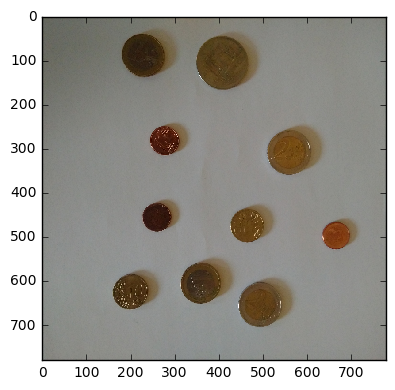

In [3]:
#read and display image
Path = './images/'
image_name = 'coins.jpg'
coins_im = imread(Path.__add__(image_name))
coins_im1 = img_as_ubyte(coins_im)
coins_im1 = rescale(coins_im, 0.25)
imshow(coins_im1)

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

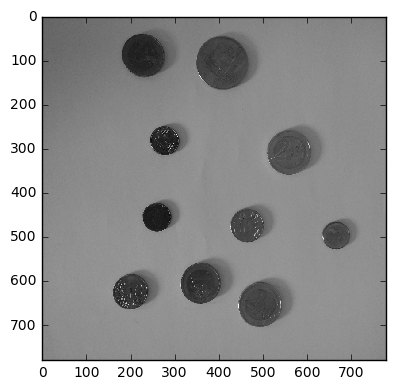

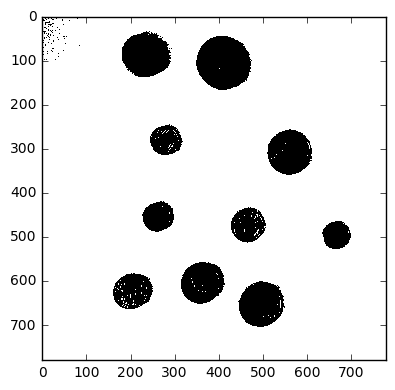

In [4]:
#convert the image to grayscale
coins_im_grey = rgb2gray(coins_im1)
plt.figure()
imshow(coins_im_grey)

#threshold the image
threshold_global_otsu = threshold_otsu(coins_im_grey)
global_otsu = coins_im_grey >= threshold_global_otsu
plt.figure()
imshow(global_otsu)

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

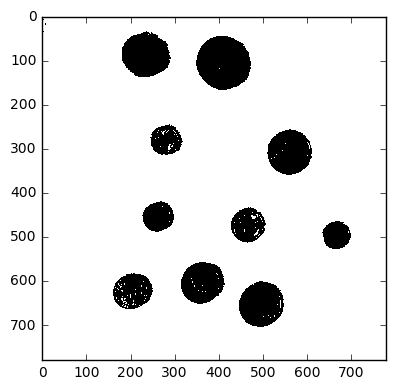

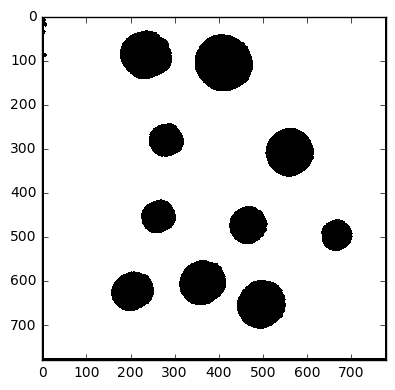

In [5]:
#Disk structuring element
selem = disk(4)

#binary closing
binary_closed = binary_closing(global_otsu)
plt.figure()
imshow(binary_closed)

#erosion
eroded = erosion(binary_closed, selem)
plt.figure()
imshow(eroded)

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

The number of regions is 11.000000 


/home/anirudh/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


The radius of region is 70.571074
The radius of region is 56.554202
The radius of region is 65.138858
The radius of region is 38.715904
The radius of region is 54.513678
The radius of region is 38.427068
The radius of region is 42.763189
The radius of region is 35.624451
The radius of region is 51.880906
The radius of region is 46.256665
The radius of region is 55.010654


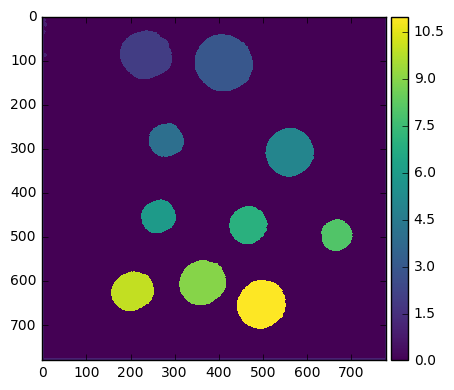

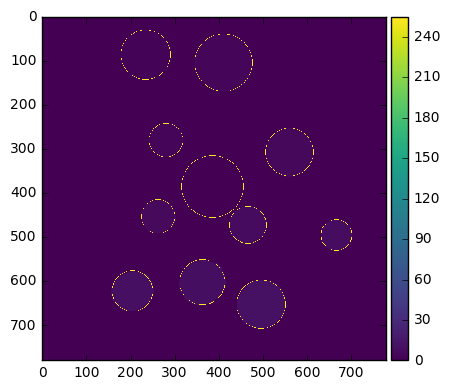

In [6]:
from skimage.draw import circle_perimeter

#label the image
labeled_im, num = label(eroded, background = True, return_num=True, connectivity=2)
print("The number of regions is %f " %num)
#plt.figure()
imshow(labeled_im)

#save the regions
regions = regionprops(labeled_im)

for prop in regions:
    radius = prop.equivalent_diameter / 2
    print("The radius of region is %f" %radius)
    centroid = prop.centroid
    circle_center = circle_perimeter(int(centroid[0]), int(centroid[1]), int(radius))
    labeled_im[circle_center[0], circle_center[1]] =  255
    
plt.figure()
imshow(labeled_im)

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

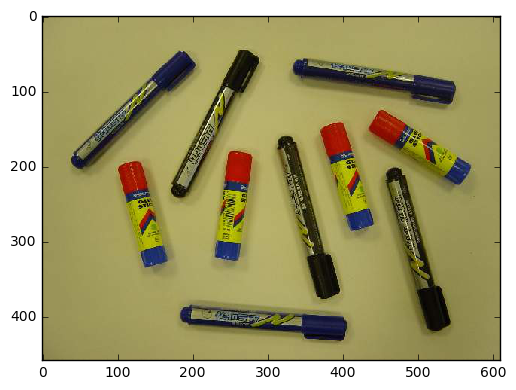

In [8]:
#read and display image
Path = './images/'
image_name1 = 'objets4.jpg'
objets4_im = imread(Path.__add__(image_name1))
objets4_im1 = img_as_ubyte(objets4_im)
imshow(objets4_im1)

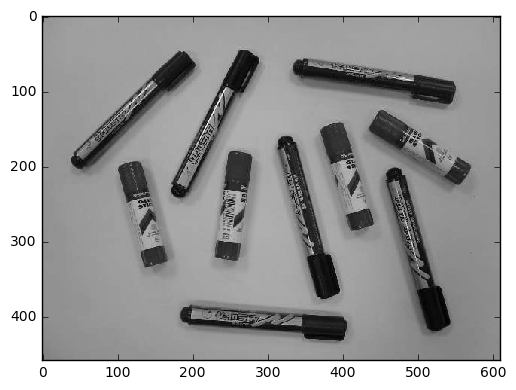

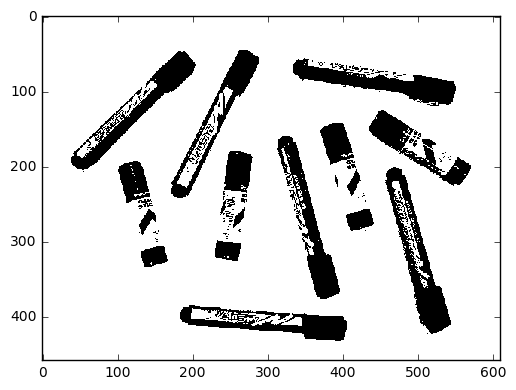

In [9]:
#convert the image to grayscale
markers_im_grey = rgb2gray(objets4_im1)
plt.figure()
imshow(markers_im_grey)

#threshold the image
threshold_global_otsu = threshold_otsu(markers_im_grey)
global_otsu = markers_im_grey >= threshold_global_otsu
plt.figure()
imshow(global_otsu)

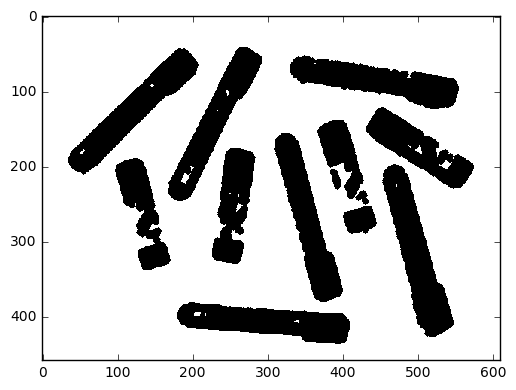

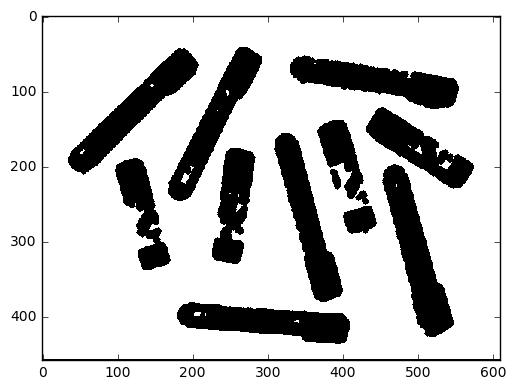

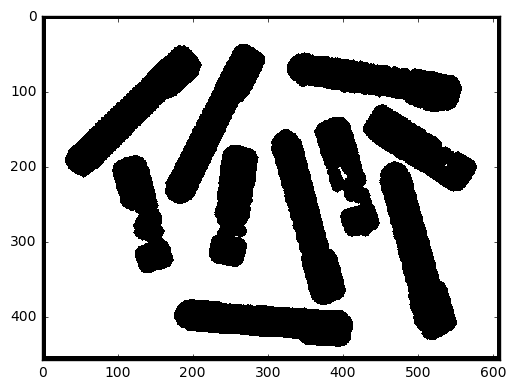

In [13]:
#Disk structuring element
selem = disk(4)

#erosion
eroded1 = erosion(global_otsu, selem)
plt.figure()
imshow(eroded1)

#binary closing
binary_closed = binary_closing(eroded1)
plt.figure()
imshow(binary_closed)

#erosion
eroded = erosion(binary_closed, selem)
plt.figure()
imshow(eroded)

/home/anirudh/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


11


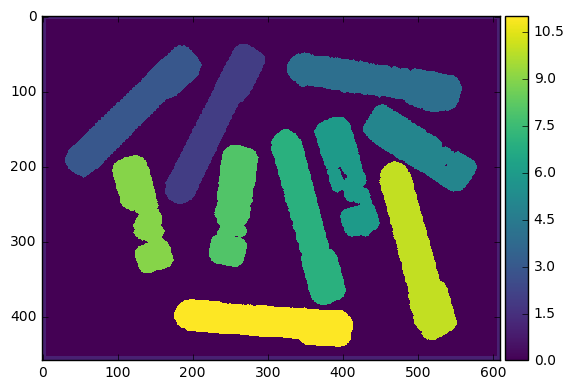

In [14]:
labels_img, num = label(eroded, background=True, return_num=True, connectivity=2)
plt.figure()
imshow(labels_img)
print (num)

[1]
The number of regions is: 10.000000


/home/anirudh/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


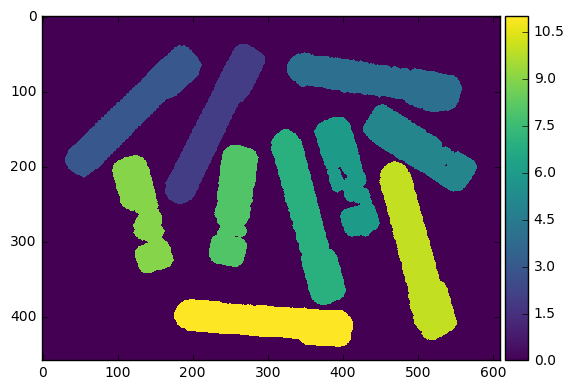

In [31]:
objects_properties = regionprops(labels_img)
n = 0
outliers = []
for regions in objects_properties:
    d = regions
    if d.filled_area < 200 or d.filled_area > 25000:
        outliers.append(d.label)
    else:
        n+=1
        
filtered_labels = np.zeros(labels_img.shape)
filtered_labels = labels_img.copy()

for i in range(labels_img.shape[0]):
    for j in range(labels_img.shape[1]):
        for n in range(len(outliers)):
            if labels_img[i][j] == outliers[n]:
                filtered_labels[i][j] = 0

print(outliers)
imshow(filtered_labels)
print('The number of regions is: %f' %(num-1))